Reference: http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/

In [10]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [11]:
dataSets = ['datasets/dataset1.txt', 'datasets/dataset2.txt', 'datasets/dataset3.txt']
clusters = [2, 3, 4, 5]

In [12]:
# returns feature_matrix(points) and true clusters for those points
def formatDataset(inputDataSet):    
    dataset = np.loadtxt(inputDataSet)
    feature_matrix = dataset[:, :-1]
    trueClusters = dataset[:,2]
    return feature_matrix, trueClusters

In [13]:
def applyGMM(feature_matrix, trueClusters, clusters):  
     
    feature1 = feature_matrix[:, 0]
    feature2 = feature_matrix[:, 1]
    
    evaluationMetrics = []
    CH = []
    SC = []
    NMI = []
    
    plt.figure(1)
    plt.figure(1).set_size_inches(18, 10)
    i = 221
    
    for k in clusters:
   
        gmix = mixture.GMM(n_components=k, covariance_type='diag')
        gmix.fit(feature_matrix)
        gmmCenters = gmix.means_
        gmmLabels = gmix.predict(feature_matrix)
        mycolors = ['red', 'green', 'blue', 'yellow', 'pink']
        clusterColors = [mycolors[i] for i in gmmLabels]
        
        plt.subplot(i)
        plt.scatter(feature1, feature2, marker='o', s=30, lw=0, alpha=0.7, c=clusterColors)        
        plt.scatter(gmmCenters[:, 0], gmmCenters[:, 1], marker='o', c="black", alpha=1, s=200)
        
        for index, center in enumerate(gmmCenters):
            plt.scatter(center[0], center[1], marker='$%d$' % index, alpha=1, s=50)
    
        pltTitle = "K = $%d$"%k
        plt.title(pltTitle)
        plt.xlabel("X")
        plt.ylabel("Y")
        i=i+1
        
        NMI.append(metrics.normalized_mutual_info_score(trueClusters, gmmLabels))
        SC.append(metrics.silhouette_score(feature_matrix, gmmLabels, metric='euclidean'))
        CH.append(metrics.calinski_harabaz_score(feature_matrix, gmmLabels))

    plt.show()

    evaluationMetrics.append(NMI)
    evaluationMetrics.append(SC)
    evaluationMetrics.append(CH)
    
    return evaluationMetrics

In [14]:
# plots line graph of different evaluation metrics
metricLabels = ['NMI', 'SC', 'CH']

def evaluateClusters(clusters, evaluationMetrics):  
    plt.figure(1)
    plt.figure(1).set_size_inches(18, 4)
    i = 131
    for metric in evaluationMetrics:        
        plt.subplot(i)        
        plt.plot(clusters, metric)
        plt.title(metricLabels[i-131])
        i=i+1
    plt.show()

In [15]:
def runGMM(dataSet) :
    feature_matrix, trueClusters = formatDataset(dataSet)
    evaluationMetrics = applyGMM(feature_matrix, trueClusters, clusters)
    evaluateClusters(clusters, evaluationMetrics)    

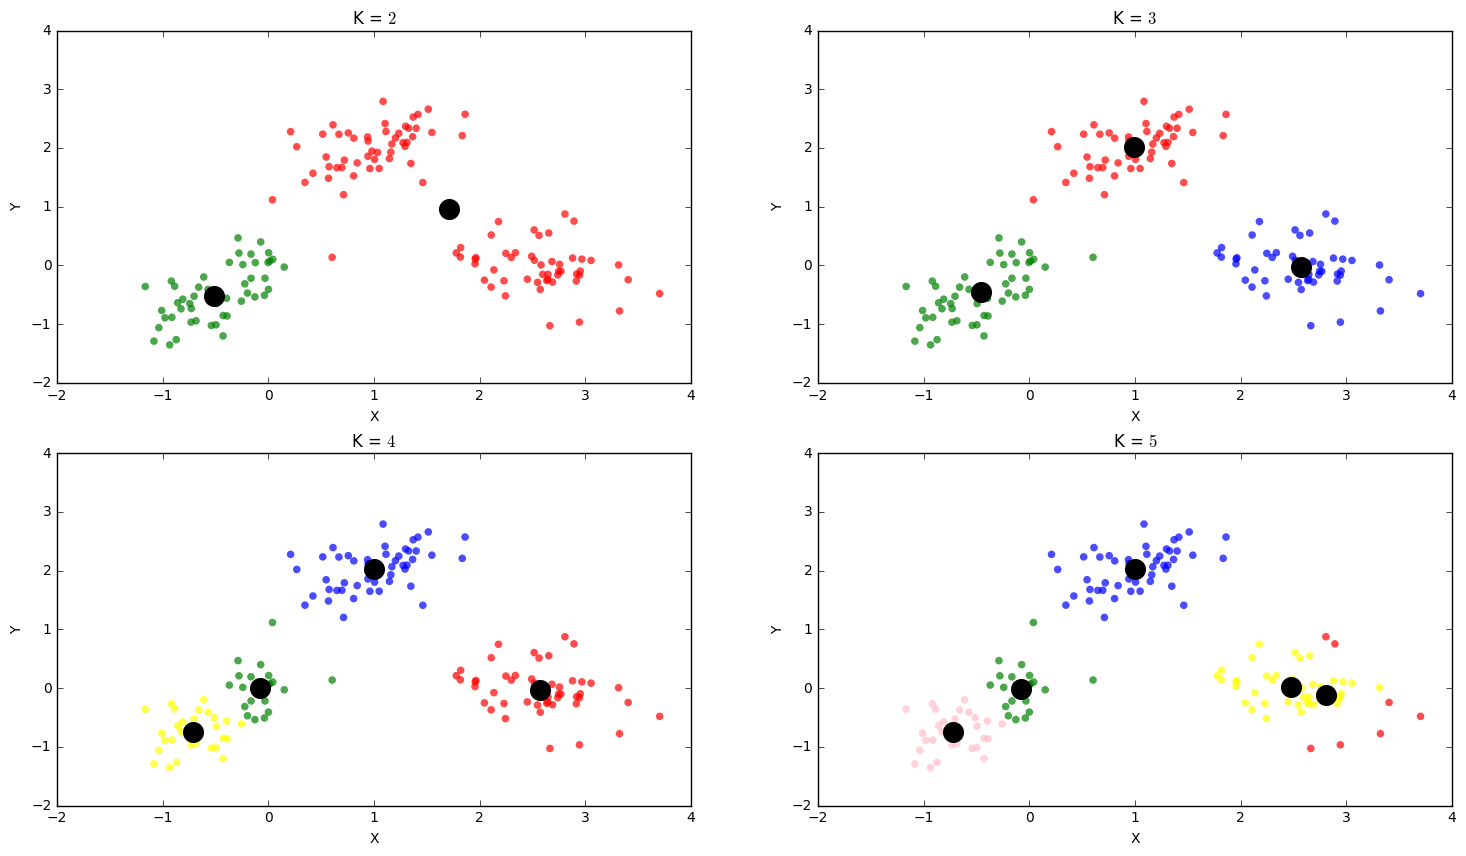

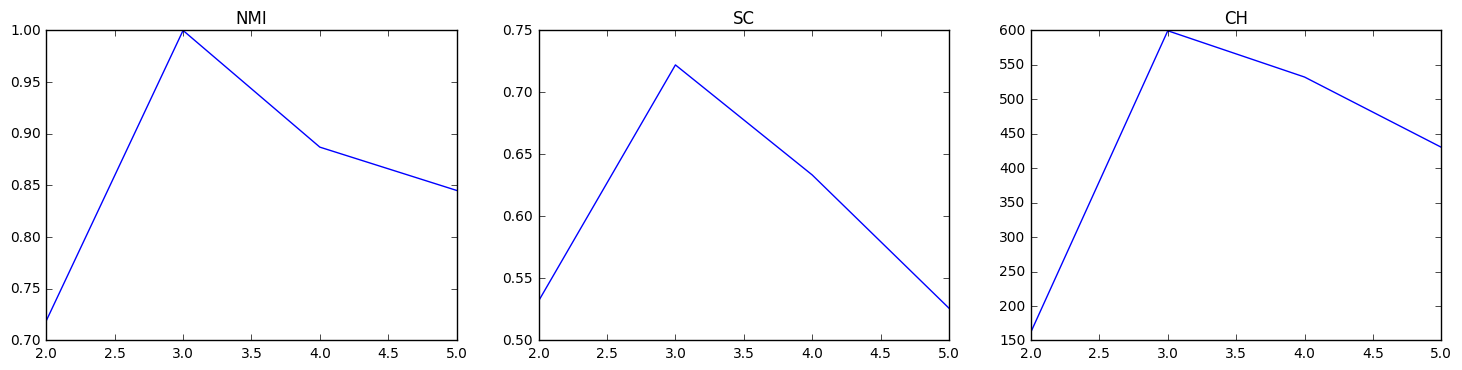

In [16]:
runGMM(dataSets[0])

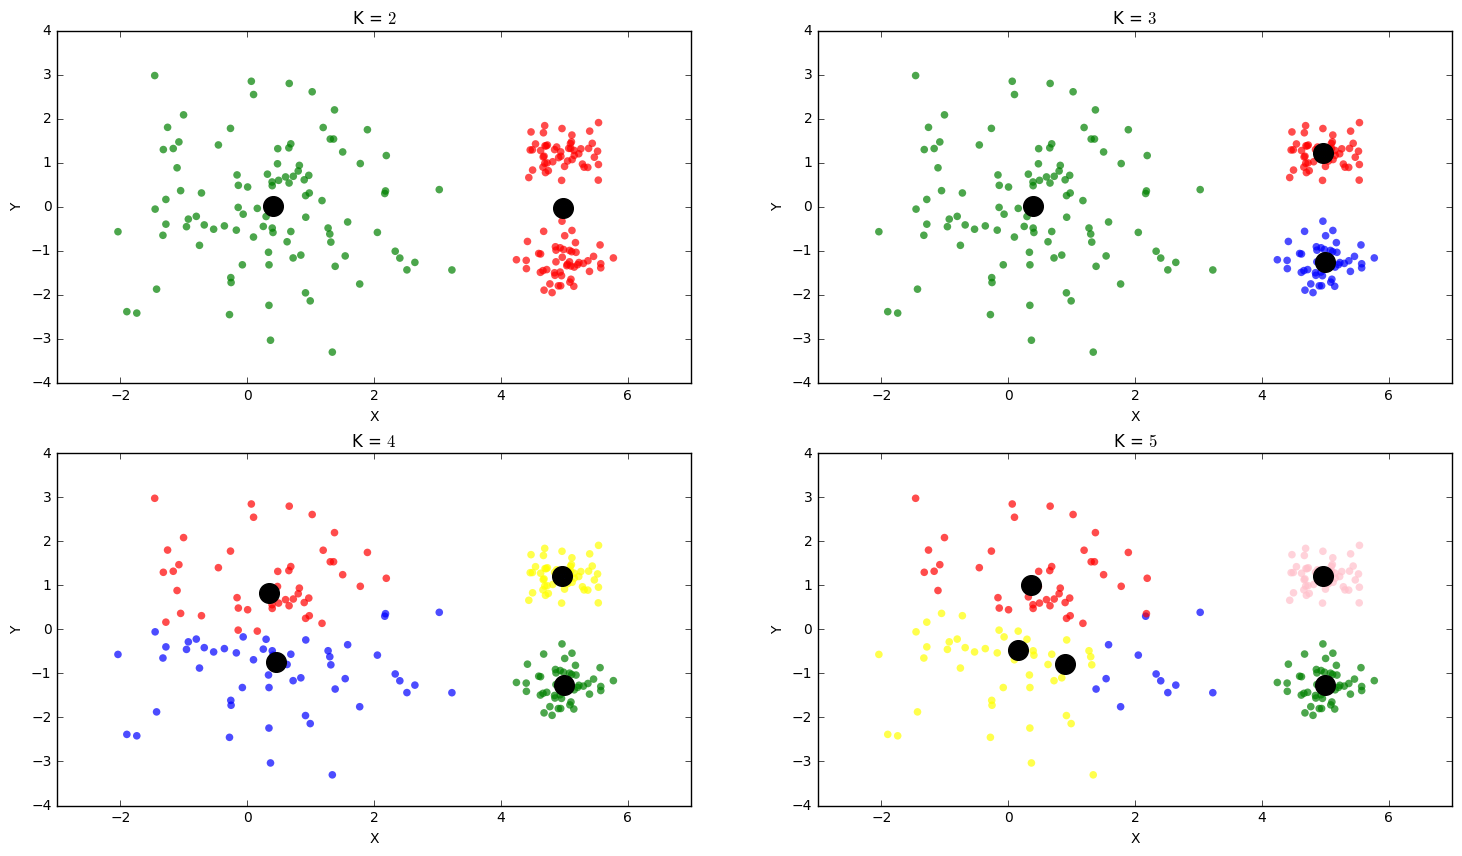

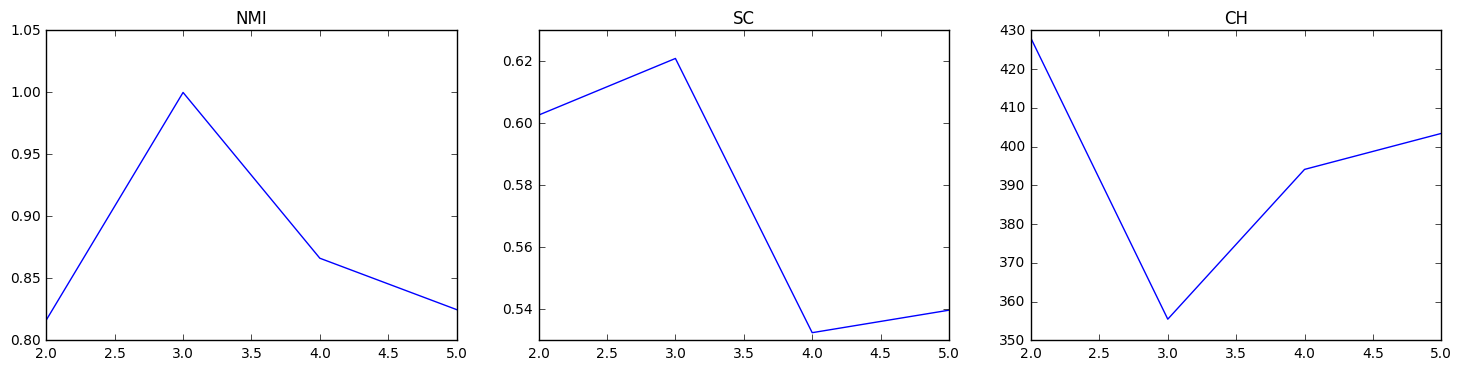

In [17]:
runGMM(dataSets[1])

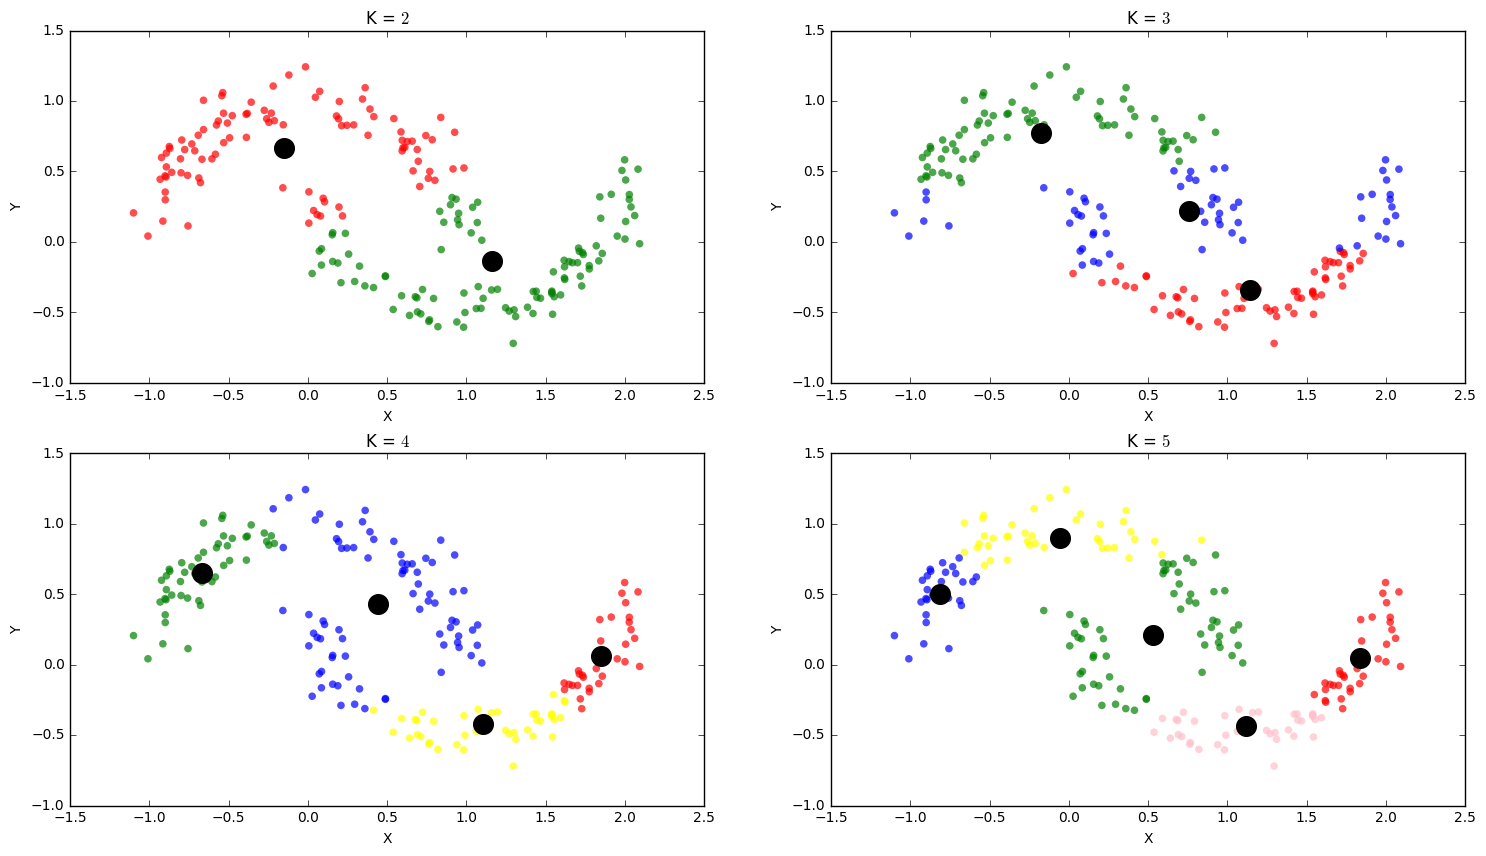

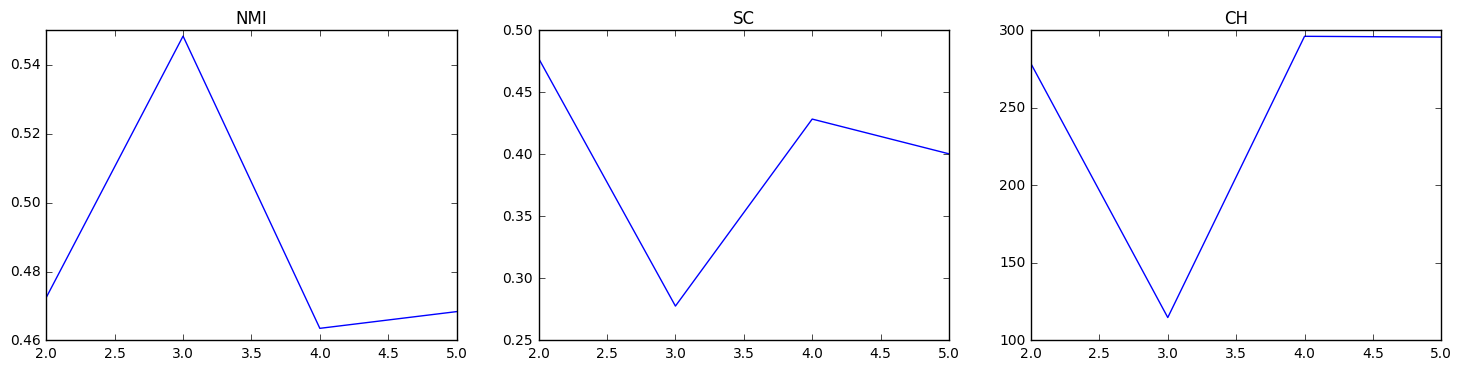

In [18]:
runGMM(dataSets[2])

Q7. <br>
A). <br>
On dataset-1 K-Means produces best clustering when K=3 with MSE = 1.6, SSE = 1.6*N, NMI = 1, SC = 0.72, CH = 600

DBSCAN produces best clustering when eps = 0.400, minPts = 4 with NMI = 0.918, SC = 0.648, CH = 344.058

GMM produces best clustering when no. of components = 3 with NMI = 1, SC = 0.72, CH = 600

Looking at the above metrics, we can say that DBSCAN isn't the best suitable clustering technique for dataset-1. However, K-Means and GMM produces best clustering. DBSCAN doesn't perform well because, the clusters have different densities. With low Eps of 0.2, DBSCAN finds 10 clusters. While, with high Eps of 0.4, it finds 3 cluster but fail to classify noise points. Thus, giving rise to error.

B). <br>
On dataset-2 K-Means produces best clustering when K=3 with MSE=1.2, NMI = 0.8, SC = 0.62

GMM produces best clustering when no. of components = 3 with NMI = 1, SC = 0.62.

Both of them produce similiar clustering. However, GMM comes on top. This is evident looking at the K-Means clustering with K=3. Some points that clearly belong to yellow cluster are classified as blue and green. Clustering produced by K-Means keeps changing for each run, since it suffers from initialization problem. This is not the case with GMM. <br>
Same is the reasoning for Dataset-3.